In [1]:
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as mat
import pandas as pd

In [2]:
pr = pd.read_csv('50_Startups.csv')

In [4]:
pr.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


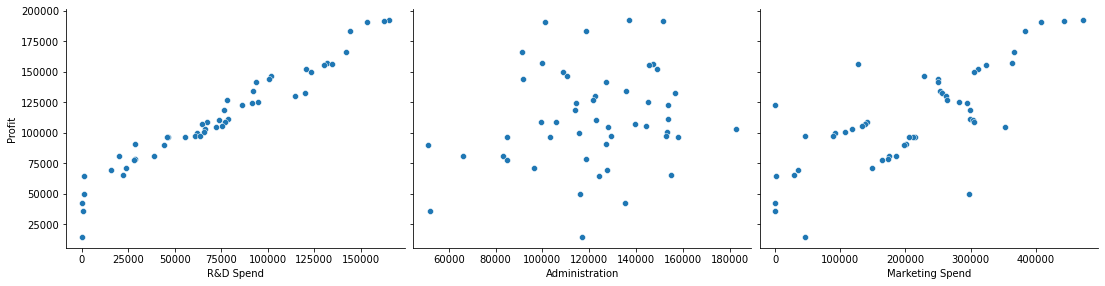

In [7]:
sns.pairplot(pr, x_vars = ['R&D Spend','Administration','Marketing Spend'],
           y_vars = 'Profit', height = 4, aspect = 1.3, kind = 'scatter' )
mat.show()

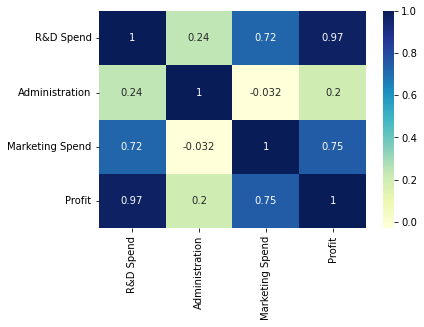

In [9]:
sns.heatmap(pr.corr(), cmap = 'YlGnBu', annot = True)
mat.show()

In [10]:
x = pr['Marketing Spend']
y = pr['Profit']

In [11]:
from sklearn.model_selection import train_test_split
x_tr,x_ts,y_tr,y_ts = train_test_split(x, y, train_size = 0.7, 
                                             test_size = 0.3,
                                             random_state = 100)

In [16]:
x_tr.shape
x_tr = x_tr.values.reshape(-1,1)
x_ts = x_ts.values.reshape(-1,1) # Series 
print(x_tr.shape)
print(x_ts.shape)

(35, 1)
(15, 1)


In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_tr, y_tr)

LinearRegression()

In [18]:
bias = lr.intercept_
weight = lr.coef_
print("Bias : ",bias)
print('Weight : ',weight)

Bias :  65239.243638063745
Weight :  [0.22925752]


In [19]:
y_tr_pred = lr.predict(x_tr)
y_ts_pred = lr.predict(x_ts)

In [20]:
print(y_tr_pred)

[ 96868.21209034  95971.23057087 112355.70860479 130021.52985744
 139490.40887506  65239.24363806  85463.93648302  75804.63387468
  65239.24363806 133956.27213015 123164.57950054 167006.32084625
 149186.10840768 122516.81466343 146209.28888906 104853.95083282
 134777.46569785  89801.52319646 135158.57423287 125842.56642379
  71735.19134465  65239.24363806 133354.96862253 124046.76015437
 102945.3911287  158761.30560134 113566.19520106  86131.7659385
 117776.11527797 125253.41356487 135109.76759891 105359.14958702
 153090.63912407  97467.07629792 136678.93446679]


In [21]:
print(y_ts_pred)

[ 94519.2853668  111349.08009005 110409.72031755  92325.60725231
  73385.71941468  75595.50745527 148427.94002547 114445.88841077
 133710.32007491  99169.61143691 173399.29753663 122495.06041712
 132851.77357907  65675.73391279 107712.66146101]


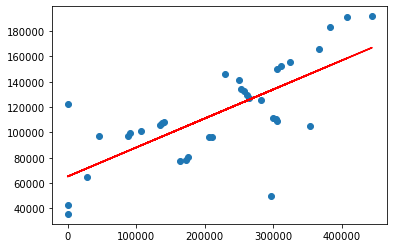

In [22]:
mat.scatter(x_tr, y_tr)
mat.plot(x_tr,bias + weight * x_tr, 'r')
mat.show()

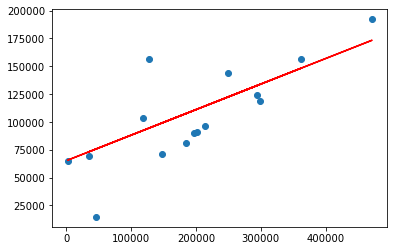

In [23]:
mat.scatter(x_ts, y_ts)
mat.plot(x_ts, y_ts_pred, 'r')
mat.show()

In [25]:
x = int(input("Enter the Marketing Spend : "))
ans = lr.predict([[x]])
print(ans)

Enter the Marketing Spend : 211025
[113618.31231364]
